In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# Biden 

#### Most Common Words Analysis

In [2]:
data = pd.read_pickle('Biden_dtm.pkl')
data = data.transpose()
data.head()

0     1     2     3     4     5     6     7     8     9     ...  5228  \
aadaro     0     0     0     0     0     0     0     0     0     0  ...     0   
aanhpi     0     0     0     0     0     0     0     0     0     0  ...     0   
aapi       0     0     0     0     0     0     0     0     0     0  ...     0   
aapis      0     0     0     0     0     0     0     0     0     0  ...     0   
aarp       0     0     0     0     0     0     0     0     0     0  ...     0   

        5229  5230  5231  5232  5233  5234  5235  5236  5237  
aadaro     0     0     0     0     0     0     0     0     0  
aanhpi     0     0     0     0     0     0     0     0     0  
aapi       0     0     0     0     0     0     0     0     0  
aapis      0     0     0     0     0     0     0     0     0  
aarp       0     0     0     0     0     0     0     0     0  

[5 rows x 5238 columns]

#### Biden's Top 25 Words

In [3]:
# Find the top 25 words said by Biden

Biden_top = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(25)
    Biden_top[c]= list(zip(top.index,top.values))

Biden_top

{0: [('scare', 1),
  ('trump', 1),
  ('hes', 1),
  ('protect', 1),
  ('donald', 1),
  ('failed', 1),
  ('political', 1),
  ('looks', 1),
  ('america', 1),
  ('violence', 1),
  ('trying', 1),
  ('sees', 1),
  ('lifeline', 1),
  ('firstinthenation', 0),
  ('firearms', 0),
  ('finding', 0),
  ('finds', 0),
  ('fine', 0),
  ('finest', 0),
  ('firstterm', 0),
  ('fists', 0),
  ('fissile', 0),
  ('finish', 0),
  ('finished', 0),
  ('finishing', 0)],
 1: [('able', 1),
  ('fundraising', 1),
  ('just', 1),
  ('general', 1),
  ('youre', 1),
  ('hours', 1),
  ('need', 1),
  ('endofmonth', 1),
  ('folks', 1),
  ('chip', 1),
  ('deadline', 1),
  ('help', 1),
  ('trump', 1),
  ('donald', 1),
  ('hit', 1),
  ('election', 1),
  ('november', 1),
  ('takes', 1),
  ('goal', 1),
  ('away', 1),
  ('win', 1),
  ('firedup', 0),
  ('firefighter', 0),
  ('finnegan', 0),
  ('firedpictwittercomznadesljxx', 0)],
 2: [('years', 1),
  ('truth', 1),
  ('stop', 1),
  ('donald', 1),
  ('violence', 1),
  ('fomented', 1

In [4]:
# Print the top 25 words

for key, top_words in Biden_top.items():
    print(key)
    print(', '.join([word for word, count in top_words[0:24]]))
    print('---')

0
scare, trump, hes, protect, donald, failed, political, looks, america, violence, trying, sees, lifeline, firstinthenation, firearms, finding, finds, fine, finest, firstterm, fists, fissile, finish, finished
---
1
able, fundraising, just, general, youre, hours, need, endofmonth, folks, chip, deadline, help, trump, donald, hit, election, november, takes, goal, away, win, firedup, firefighter, finnegan
---
2
years, truth, stop, donald, violence, fomented, trump, finishing, firedpictwittercomznadesljxx, fired, firearms, finnegan, finish, finished, firefighter, finest, fine, finds, finding, financing, firedup, único, firefighters, fiscal
---
3
tell, amari, ready, willing, charismatic, saying, man, world, poised, years, president, young, met, greatness, field, firm, finish, finished, finishing, finnegan, firearms, fired, firedpictwittercomznadesljxx, firedup
---
4
patrol, country, nearly, really, cops, small, closed, year, died, feel, businesses, safer, killed, trump, covid, firedup, firm,

democracy, home, america, means, restoring, abroadhttpswwwideaintnewsmediamultimediareportscalldefenddemocracy, confronting, soul, dictators, defend, world, president, cozying, fixing, globally, im, threat, finest, finish, fine, finished, finishing, finnegan, finds
---
604
health, care, right, privilege, único, firearms, firefighters, firefighter, firedup, firedpictwittercomznadesljxx, fired, finishing, finnegan, finished, finish, finest, fine, finds, fires, firm, financing, fisher, fiveday, fitting
---
605
mr, disappear, just, president, concrete, virus, going, listen, action, want, experts, clear, finished, finish, finnegan, firearms, fired, firedpictwittercomznadesljxx, firedup, firefighter, firefighters, finest, fine, finishing
---
606
pride, anniversary, community, join, et, celebrate, jvn, kjeanpierre, drbiden, worlds, tonight, hosting, catcora, march, theebillyporter, pm, finnegan, firefighters, finishing, firearms, fired, finished, finish, firedpictwittercomznadesljxx
---
607
c

---
1682
right, vote, making, american, harder, easier, voting, fundamental, finest, finish, firefighter, fine, finds, finished, finishing, finnegan, firearms, finding, fired, firedpictwittercomznadesljxx, firedup, único, firefighters, firstterm
---
1683
believes, administrator, just, constitution, defends, donald, president, election, threat, betsy, educator, attorney, epa, actual, beating, change, climate, general, existential, replacing, having, trump, devos, ensuring
---
1684
meeting, good, point, pretty, brightened, day, tina, fishing, firefighter, finds, fine, finest, finish, finished, fiveday, finishing, finnegan, firearms, fitting, fired, firedpictwittercomznadesljxx, firedup, fit, fisher
---
1685
tuesday, nevada, super, momentum, comeback, south, help, need, sign, community, involved, carolina, httpjoebidencomvolunteer, started, carry, firedpictwittercomznadesljxx, firedup, firefighter, único, fired, firearms, finnegan, finishing, finished
---
1686
breakers, tall, accept, task

2821
violence, domestic, bonnie, reflecting, weve, assault, progress, people, campbell, sexual, like, kind, history, words, grateful, women, firearms, firedpictwittercomznadesljxx, fired, único, finnegan, finishing, finish, finest
---
2822
stealing, cheating, trumps, president, lying, long, service, integrity, record, day, career, nation, public, único, fired, firearms, finishing, finnegan, firedup, finished, finish, finest, fine, finds
---
2823
like, gun, epidemic, safety, movement, folks, gone, fight, end, determination, gabbygiffords, reform, violence, cause, courage, groups, finished, finish, finishing, finnegan, firearms, fired, finest, fine
---
2824
farmers, claiming, having, campaigned, administration, farms, americas, opportunities, promise, abandoning, survive, trump, family, count, expand, broke, president, backs, firedup, firearms, firedpictwittercomznadesljxx, fired, firefighters, finnegan
---
2825
justice, thurgood, voice, liberty, rights, legal, ago, changed, pushed, equa

---
3725
feel, safe, politics, students, walk, school, towns, cities, streets, work, workers, worst, finds, finding, financing, fine, finest, financially, finish, finished, finishing, finnegan, firearms, fired
---
3726
gun, consider, grip, firm, congress, republicans, action, reforms, need, manufacturers, nra, commonsense, refuse, fine, finds, finest, finish, finished, finishing, finnegan, firearms, fired, firedpictwittercomznadesljxx, fires
---
3727
short, countless, gun, team, today, orange, lives, senseless, wearing, acts, violence, cut, remembrance, people, america, nationalgunviolenceawarenessday, country, fifthhighest, fired, firefighters, ff, firefighter, firedup, firedpictwittercomznadesljxx
---
3728
right, care, health, dependent, weve, way, step, support, roll, longer, makes, assault, code, womens, rights, progress, believe, someones, years, seeks, zip, amendment, focusing, financing
---
3729
remembrances, values, today, dutys, memorials, june, honor, defending, fought, recom

---
4716
work, folks, biden, living, pay, hard, way, attacking, vp, instead, romney, respecting, finished, finish, finishing, firefighters, finest, finnegan, firearms, fine, fired, firedpictwittercomznadesljxx, firedup, firefighter
---
4717
romneyryan, control, health, voucher, medicare, insurance, turn, biden, companies, vp, fissile, finds, fine, finest, fitting, finish, finished, fit, fists, finishing, finnegan, firearms, fired, firedpictwittercomznadesljxx
---
4718
education, cut, elementary, romneyryan, cuts, budget, year, secondary, calls, billion, massive, firedpictwittercomznadesljxx, fired, firearms, finishing, finnegan, firefighter, finished, finish, finest, fine, firedup, único, firefighters
---
4719
class, middle, amazing, isnt, care, convention, say, discovered, gop, vp, finnegan, firearms, fires, fired, firedpictwittercomznadesljxx, firedup, finishing, finished, finish, firefighter, firefighters, finest, único, firmly
---
4720
trillion, debt, cut, forward, va, president, c

#### Wordcloud

In [5]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

tweet_words = '' 

In [6]:
Biden_clean1 = pd.read_pickle('Biden.pkl')

In [7]:
addStops = ["donald","trump","biden","president","american", "america","president","nation","country","day","time","need","people","make","let",]

In [8]:
BTweet_words = '' 
stopwords = text.ENGLISH_STOP_WORDS.union(addStops)

for tweet in Biden_clean1:
    tweet = str(tweet)
    tokens = tweet.split()

    BTweet_words += " ".join(tokens)+" "

In [9]:
wc = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_font_size = 100).generate(BTweet_words) 

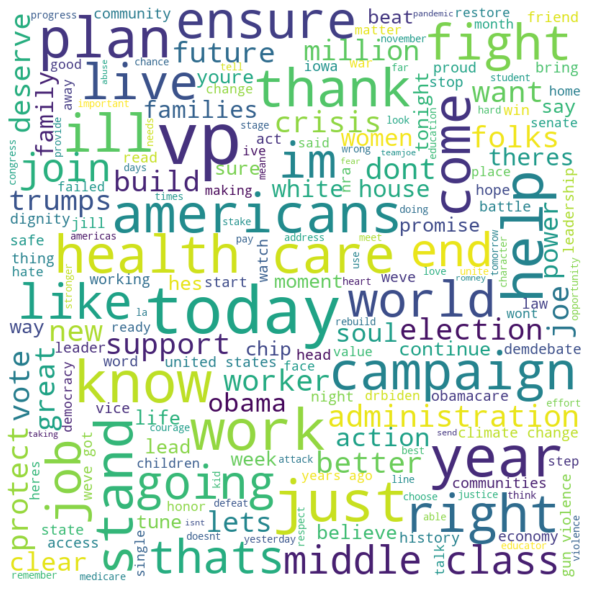

In [10]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Clinton

#### Most Common Words Analysis

In [11]:
data1 = pd.read_pickle('Clinton_dtm.pkl')
data1 = data1.transpose()
data1.head()

0     1     2     3     4     6     7     9     10    14    ...  \
abandon        0     0     0     0     0     0     0     0     0     0  ...   
abandoned      0     0     0     0     0     0     0     0     0     0  ...   
abandoning     0     0     0     0     0     0     0     0     0     0  ...   
abbott         0     0     0     0     0     0     0     0     0     0  ...   
abierta        0     0     0     0     0     0     0     0     0     0  ...   

            4906  4908  4910  4911  4912  4913  4914  4915  4916  4918  
abandon        0     0     0     0     0     0     0     0     0     0  
abandoned      0     0     0     0     0     0     0     0     0     0  
abandoning     0     0     0     0     0     0     0     0     0     0  
abbott         0     0     0     0     0     0     0     0     0     0  
abierta        0     0     0     0     0     0     0     0     0     0  

[5 rows x 3226 columns]

#### Clinton's Top 25 Words

In [12]:
# Find the top 25 words said by Clinton

Clinton_top = {}
for c in data1.columns:
    top = data1[c].sort_values(ascending=False).head(25)
    Clinton_top[c]= list(zip(top.index,top.values))

Clinton_top

{0: [('action', 1),
  ('election', 1),
  ('question', 1),
  ('make', 1),
  ('better', 1),
  ('life', 1),
  ('plans', 1),
  ('fuego', 0),
  ('fueling', 0),
  ('fulton', 0),
  ('fuera', 0),
  ('ftc', 0),
  ('fueron', 0),
  ('fuerza', 0),
  ('fulfill', 0),
  ('fulltime', 0),
  ('fully', 0),
  ('funciona', 0),
  ('fun', 0),
  ('fromjoebiden', 0),
  ('fund', 0),
  ('fundamental', 0),
  ('fundamentally', 0),
  ('funding', 0),
  ('fundraising', 0)],
 1: [('paying', 1),
  ('said', 1),
  ('taxes', 1),
  ('unpatriotic', 1),
  ('donald', 1),
  ('smart', 1),
  ('night', 1),
  ('know', 1),
  ('trump', 1),
  ('fully', 0),
  ('ftc', 0),
  ('fuego', 0),
  ('fueling', 0),
  ('fuera', 0),
  ('fueron', 0),
  ('fuerza', 0),
  ('fulfill', 0),
  ('fulltime', 0),
  ('fundsby', 0),
  ('fundraising', 0),
  ('fulton', 0),
  ('fun', 0),
  ('fromjoebiden', 0),
  ('funciona', 0),
  ('fund', 0)],
 2: [('showed', 1),
  ('command', 1),
  ('hillaryclinton', 1),
  ('debate', 1),
  ('vision', 1),
  ('shes', 1),
  ('prou

In [13]:
# Print the top 25 words

for key, top_words in Clinton_top.items():
    print(key)
    print(', '.join([word for word, count in top_words[0:24]]))
    print('---')

0
action, election, question, make, better, life, plans, fuego, fueling, fulton, fuera, ftc, fueron, fuerza, fulfill, fulltime, fully, funciona, fun, fromjoebiden, fund, fundamental, fundamentally, funding
---
1
paying, said, taxes, unpatriotic, donald, smart, night, know, trump, fully, ftc, fuego, fueling, fuera, fueron, fuerza, fulfill, fulltime, fundsby, fundraising, fulton, fun, fromjoebiden, funciona
---
2
showed, command, hillaryclinton, debate, vision, shes, proud, potus, nights, ready, fueron, frontera, ftc, fuego, fueling, fuera, únicos, fuerza, frm, fulfill, fulltime, fully, fulton, fun
---
3
httpstcottgeqxnqym, theres, sure, vote, make, youre, ready, stand, fuera, frm, fromjoebiden, frontera, ftc, fuego, fueling, fueron, friendswe, fuerza, fulfill, fulltime, fully, fulton, fun, funciona
---
4
answer, racial, httpstcosjneokckis, asked, injustice, theyd, real, confront, candidates, fueling, fulfill, fuego, ftc, fueron, fuerza, frontera, fuera, fully, fulltime, frm, fulton, fun

---
783
death, life, make, judgment, decisions, commanderinchief, steadiness, strength, needs, fulfill, fuerza, únicos, fulltime, fuera, fueling, fuego, ftc, fueron, funciona, fully, fulton, fun, fromjoebiden, fund
---
784
commanderinchief, experience, temperament, nbcnewsforum, steady, takes, toughness, fun, fueling, fuera, fueron, fuerza, fulfill, fulltime, fully, fulton, únicos, funciona, ftc, fund, fundamental, fundamentally, funding, fundraising
---
785
unfit, httpstcoulohjdzxte, proven, hes, commanderinchief, donald, trump, funding, fundamentally, frontera, ftc, fuego, fueling, fuera, fueron, fuerza, fulfill, fulltime, fully, furious, fulton, fun, funny, fund
---
786
set, oval, foot, talks, trash, military, office, person, fuerza, fulfill, únicos, fueron, fulltime, fueling, fuego, ftc, fuera, fully, fromjoebiden, fulton, fun, funciona, fund, fundamental
---
787
gen, vision, includes, unity, force, america, dnc, john, allen, fundamental, funding, fundsby, funds, ftc, fuego, fuelin

---
1808
thursday, httpstcoyurpglmykr, accepted, president, balloons, hillary, nomination, democratic, fuerza, únicos, fulfill, fuera, fueling, fuego, ftc, frontera, fueron, fulton, fulltime, fully, fun, funciona, fund, fundamental
---
1812
trump, dark, days, picture, painted, divisive, stop, donald, america, president, fuego, fueling, fuera, fueron, fuerza, fulfill, fully, fulltime, frontera, fulton, fun, funciona, fund, fundamental
---
1813
history, books, headlines, únicos, frm, frontera, ftc, fuego, fueling, fuera, fueron, fuerza, fulfill, fulltime, fully, fulton, fun, funciona, fund, fundamental, fundamentally, funding, fundraising, funds
---
1814
zika, blocking, httpstcokjmwmdogdl, fl, stop, transmission, critical, republicans, action, local, fuego, fueling, ftc, fuera, fueron, fuerza, fulfill, fulltime, únicos, fun, fully, fulton, funciona, fund
---
1817
fighting, voting, struck, easier, voter, nc, democracy, circuit, law, lets, just, make, big, discrimination, victory, fulltime

shed, president, tell, time, nominated, hillary, mom, fuerza, fulltime, fulfill, únicos, fully, fuera, fueling, fuego, ftc, fueron, fun, fulton, funciona, fund, fundamental, fundamentally, funding
---
3645
come, speaking, madam, hard, january, want, say, president, words, imwithher, fueling, ftc, fuego, frontera, fromjoebiden, frm, fuera, fulfill, fueron, fuerza, friendswe, fulltime, fully, fulton
---
3646
crowd, davidmuir, speech, looks, cheering, emotional, watch, hillaryclinton, gets, únicos, fuerza, fueron, fueling, fuera, fulltime, fuego, ftc, frontera, fulfill, fun, fully, fulton, frm, funciona
---
3647
history, lets, making, únicos, fully, ftc, fuego, fueling, fuera, fueron, fuerza, fulfill, fulltime, fulton, fromjoebiden, fun, funciona, fund, fundamental, fundamentally, funding, fundraising, funds, fundsby
---
3648
california, thank, fun, ftc, fuego, fueling, fuera, fueron, fuerza, fulfill, fulltime, fully, fulton, funciona, fromjoebiden, fund, fundamental, fundamentally, fundi

#### Wordcloud

In [14]:
Clinton_clean1 = pd.read_pickle('Clinton_dtm.pkl')

In [15]:
addCStops = ["donald","trump","hillary","clinton", "president","hillarys","country","people","american","america","let","potus","and","the","in","is","for","a","of","on","to","that","it","as","be","are","he","you","hi","this"]

In [16]:
CTweet_words1 = '' 
stopwords = text.ENGLISH_STOP_WORDS.union(addCStops)

for tweet in Clinton_clean1:
    tweet = str(tweet)
    tokens = tweet.split()

    CTweet_words1 += " ".join(tokens)+" "

In [17]:
wc = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_font_size = 100).generate(CTweet_words1) 

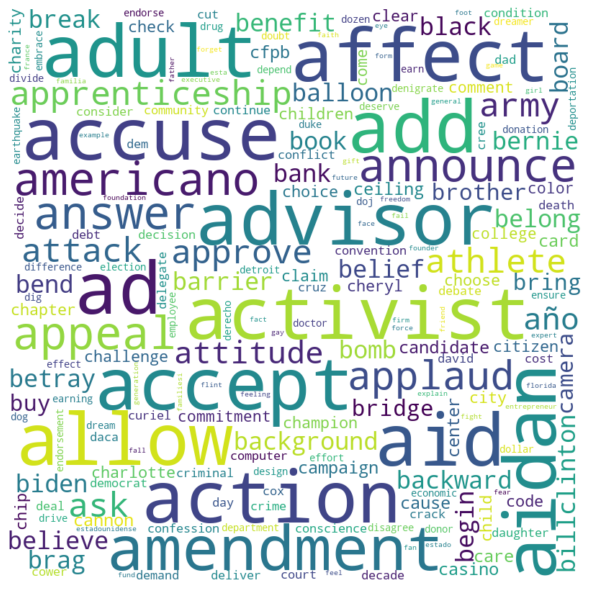

In [18]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Trump

#### Most Common Words Analysis

In [19]:
data2 = pd.read_pickle('Trump_dtm.pkl')
data2 = data2.transpose()
data2.head()

5     8     11    12    13    15    16    27    33    42    \
abandon            0     0     0     0     0     0     0     0     0     0   
abandoned          0     0     0     0     0     0     0     0     0     0   
abc                0     0     0     0     0     0     0     0     0     0   
abcdonaldtrump     0     0     0     0     0     0     0     0     0     0   
abcpolitics        0     0     0     0     0     0     0     0     0     0   

                ...  6434  6435  6436  6437  6438  6439  6440  6441  6442  \
abandon         ...     0     0     0     0     0     0     0     0     0   
abandoned       ...     0     0     0     0     0     0     0     0     0   
abc             ...     0     0     0     0     0     0     0     0     0   
abcdonaldtrump  ...     0     0     0     0     0     0     0     0     0   
abcpolitics     ...     0     0     0     0     0     0     0     0     0   

                6443  
abandon            0  
abandoned          0  
abc                0  
abcdonaldtrump     0  
abcpolitics        0  

[5 rows x 3218 columns]

#### Trump's Top 25 Words

In [20]:
# Find the top 25 words said by Trump

Trump_top = {}
for c in data2.columns:
    top = data2[c].sort_values(ascending=False).head(25)
    Trump_top[c]= list(zip(top.index,top.values))

Trump_top

{5: [('tomorrow', 1),
  ('rally', 1),
  ('join', 1),
  ('tickets', 1),
  ('council', 1),
  ('httpstcodfzsbicixc', 1),
  ('iowa', 1),
  ('midamerica', 1),
  ('center', 1),
  ('bluffs', 1),
  ('gift', 0),
  ('getting', 0),
  ('ghfanlovessonny', 0),
  ('ghosthunterlol', 0),
  ('giant', 0),
  ('zuluout', 0),
  ('gifted', 0),
  ('gets', 0),
  ('gigglemitz', 0),
  ('ginsburg', 0),
  ('girl', 0),
  ('girlfriend', 0),
  ('gitmo', 0),
  ('giuliani', 0),
  ('given', 0)],
 8: [('httpstcouywjrtzkae', 1),
  ('today', 1),
  ('join', 1),
  ('people', 1),
  ('httpstcolwjydbphav', 1),
  ('movement', 1),
  ('government', 1),
  ('gay', 0),
  ('gifts', 0),
  ('gets', 0),
  ('getting', 0),
  ('ghfanlovessonny', 0),
  ('gatewaypundit', 0),
  ('ghosthunterlol', 0),
  ('giant', 0),
  ('gift', 0),
  ('gifted', 0),
  ('gigglemitz', 0),
  ('germany', 0),
  ('ginsburg', 0),
  ('girl', 0),
  ('girlfriend', 0),
  ('gitmo', 0),
  ('giuliani', 0),
  ('given', 0)],
 11: [('make', 1),
  ('sure', 1),
  ('voterregistrati

In [21]:
# Print the top 25 words

for key, top_words in Trump_top.items():
    print(key)
    print(', '.join([word for word, count in top_words[0:24]]))
    print('---')

5
tomorrow, rally, join, tickets, council, httpstcodfzsbicixc, iowa, midamerica, center, bluffs, gift, getting, ghfanlovessonny, ghosthunterlol, giant, zuluout, gifted, gets, gigglemitz, ginsburg, girl, girlfriend, gitmo, giuliani
---
8
httpstcouywjrtzkae, today, join, people, httpstcolwjydbphav, movement, government, gay, gifts, gets, getting, ghfanlovessonny, gatewaypundit, ghosthunterlol, giant, gift, gifted, gigglemitz, germany, ginsburg, girl, girlfriend, gitmo, giuliani
---
11
make, sure, voterregistrationday, registered, national, youre, vote, makeamericagreatagain, ginsburg, georgia, georgiasaturday, georgiasupertuesday, geraldo, geraldorivera, germany, gitmo, gerriweth, girl, getting, ghfanlovessonny, girlfriend, ghosthunterlol, giant, gift
---
12
continues, foundation, campaign, make, disclosure, httpstcozhkefuouhh, clintons, claims, false, hillary, giant, zuluout, ghosthunterlol, gifted, ghfanlovessonny, getting, gift, ginsburg, gifts, gigglemitz, gerriweth, girl, girlfriend

resorts, opponent, hope, run, amercan, lewenskimo, attacks, represent, knows, personal, ideas, ghfanlovessonny, zuluout, getting, giant, gets, gerriweth, ghosthunterlol, gifts, gift, gifted, geraldorivera, gigglemitz, ginsburg
---
1086
campaign, flashbackfriday, address, racist, clinton, hillary, undertones, needs, giuliani, glad, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gift, giving, gives, gifted, gifts, gigglemitz, gerriweth, girl, girlfriend
---
1087
gouging, httpstcohhlngnlgmn, donor, foundation, dailycaller, epipens, clinton, donaldjtrumpjr, price, partner, company, gitmo, gives, getting, ghfanlovessonny, ghosthunterlol, giant, glad, giving, gift, girlfriend, gifted, given, gifts
---
1088
praised, hillary, flashback, friend, mentor, robert, foxnation, byrd, kkk, clinton, member, generals, gays, ghfanlovessonny, ghosthunterlol, gave, giant, gift, gifted, gifts, gathering, gigglemitz, ginsburg, girl
---
1089
speech, cities, sabotage, inner, transcript, clinton, corrup

---
3393
texas, houston, americafirst, thank, zuluout, gifts, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gift, gifted, gigglemitz, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, giving, glad, glasses
---
3395
thank, americafirst, glenn, gerriweth, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gift, gifted, gifts, gigglemitz, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, giving, glad, glasses, germany
---
3396
cleveland, convention, amazing, girl, getting, ghfanlovessonny, ghosthunterlol, giant, gift, gifted, gifts, gigglemitz, ginsburg, zuluout, gerriweth, girlfriend, gitmo, giuliani, given, gives, giving, glad, glasses, gets
---
3397
httpstcoutcxpbwpve, way, thank, zuluout, gift, geraldorivera, germany, gerriweth, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gifts, gifted, gigglemitz, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, giving
---
3398
thank, dallaspd, gifts, germany, gerriweth, gets, getting, ghfanlovesson

votetrumpid, zuluout, germany, gerriweth, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gift, gifted, gifts, geraldo, gigglemitz, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, giving, geraldorivera, georgiasupertuesday
---
5379
httpstcoccclxnisso, votetrumphi, georgiasupertuesday, geraldorivera, germany, gerriweth, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gift, zuluout, gifted, gifts, gigglemitz, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, geraldo
---
5380
votetrumpmi, zuluout, gifts, germany, gerriweth, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gift, gifted, gigglemitz, geraldo, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, giving, geraldorivera, georgiasupertuesday
---
5381
votetrumpms, zuluout, gifts, germany, gerriweth, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gift, gifted, gigglemitz, geraldo, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, giving, geraldorivera, georgiasupertuesd

---
6381
drehle, written, cover, time, week, magazine, david, best, von, stories, gift, gets, getting, ghfanlovessonny, ghosthunterlol, giant, gigglemitz, gifted, gifts, ginsburg, girl, girlfriend, gitmo, giuliani
---
6382
earnest, great, person, thank, gathering, gave, getting, ghfanlovessonny, ghosthunterlol, gatewaypundit, giant, gateway, gift, gifted, gifts, gigglemitz, ginsburg, girl, girlfriend, gitmo, giuliani, given, gives, giving
---
6383
watched, seanhannity, thank, waiting, jonahnro, long, statements, appreciate, time, girlfriend, ghfanlovessonny, germany, giuliani, gitmo, gerriweth, gets, getting, ghosthunterlol, giant, gift, geraldorivera, gifts, gigglemitz, ginsburg
---
6384
cillizza, amp, change, thank, chris, right, thefix, person, character, true, opinion, gifts, gifted, gift, giant, ghosthunterlol, ghfanlovessonny, gigglemitz, zuluout, ginsburg, girl, getting, gitmo, giuliani
---
6385
settled, tribe, matterit, expert, citizen, harvard, constitutional, law, laurence, b

#### Wordcloud

In [22]:
Trump_clean1 = pd.read_pickle('Trump_dtm.pkl')

In [23]:
addTStops = ["httpstcouywjrtzkae","will","trump","for","was","amp","realdonaldtrump","and","wa","so","as","the","in","to","of","on","the","a","this","that","be","is","it","by"]

In [24]:
TTweet_words1 = '' 
stopwords = text.ENGLISH_STOP_WORDS.union(addTStops)

for tweet in Trump_clean1:
    tweet = str(tweet)
    tokens = tweet.split()

    TTweet_words1 += " ".join(tokens)+" "

In [25]:
wc = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_font_size=100).generate(TTweet_words1) 

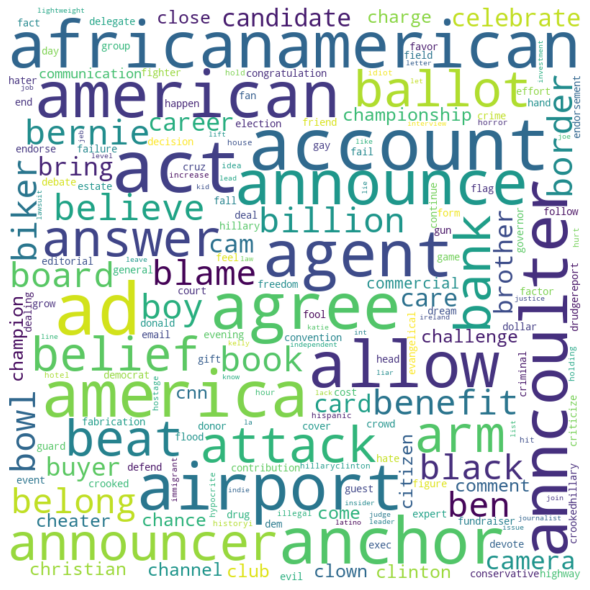

In [26]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()